<a href="https://colab.research.google.com/github/EmilEdvardsson/10oct-22apr/blob/main/result_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb
import sklearn.model_selection as skl_ms
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
#!pip install catboost
#from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, explained_variance_score
import scipy.integrate as it
import seaborn as sns; sns.set_theme(color_codes=True)
import joblib
import pickle
import statistics as st
import math

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
DATA_PATH = '/content/gdrive/MyDrive/Full_dictionary.pkl'
infile = open(DATA_PATH,'rb')
modelS = pickle.load(infile)
DATA_PATH = '/content/gdrive/MyDrive/Full_ferroamp_dictionary.pkl'
infile = open(DATA_PATH,'rb')
modelF = pickle.load(infile)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/Jumkil_Correct.csv')
df_min = pd.read_csv('/content/gdrive/MyDrive/Jumkil_15min_Correct.csv')
df = df.drop(['Unnamed: 0'],axis=1)
df_min = df_min.drop(['Unnamed: 0'],axis=1)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df_min[df_min['Day'] == 30]['Effekt kW'].std()

13.487355746745633

In [ ]:
years = [2021,2022]
months = [1,2,3,4,5,6,8,9,10,11,12]
days = list(range(1,32))

Text(0, 0.5, 'Hour of the day')

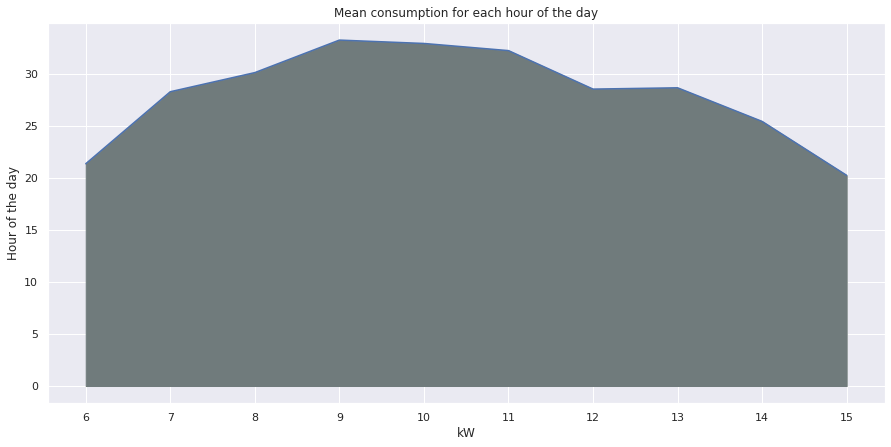

In [ ]:
hours = list(range(6,16))
mean_day = []
upper_std = []
lower_std = []
for i in hours:
  mean_day.append(df_min[df_min['Hour'] == i]['Effekt kW'].mean())
  upper_std.append(df_min[df_min['Hour'] == i]['Effekt kW'].mean() + df_min[df_min['Hour'] == i]['Effekt kW'].std())
  lower_std.append(df_min[df_min['Hour'] == i]['Effekt kW'].mean() - df_min[df_min['Hour'] == i]['Effekt kW'].std())
x = np.arange(0,10,1)
plt.figure(figsize=(15, 7))
plt.fill_between(x,mean_day, [0]*len(mean_day), color='#707B7C',label='Imported from grid')
positions = range(0,len(mean_day),1)
labels = list(range(6,16))
plt.xticks(positions, labels)
plt.plot(mean_day)
plt.title('Mean consumption for each hour of the day')
plt.xlabel('kW')
plt.ylabel('Hour of the day')
#plt.plot(upper_std,'--')
#plt.plot(lower_std,'--')


In [ ]:
len(df_min)

17488

In [ ]:
df_min[df_min['Hour'] == i]['Effekt kW'].mean() + df_min[df_min['Hour'] == i]['Effekt kW'].std()

32.17006106221962

In [ ]:
df_min[df_min['Hour'] == 8]['Effekt kW'] < 30

7         True
8         True
9         True
10        True
42        True
         ...  
17419    False
17456     True
17457     True
17458    False
17459    False
Name: Effekt kW, Length: 1763, dtype: bool

In [ ]:
df_min[df_min[df_min['Hour'] == 8]['Effekt kW'] < ((df_min[df_min['Hour'] == 8]['Effekt kW'].mean() + df_min[df_min['Hour'] == 8]['Effekt kW'].std()))]['Effekt kW']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: ignored

In [ ]:
df_min[(df_min[df_min['Hour'] == 8]['Effekt kW']) < (df_min[df_min['Hour'] == i]['Effekt kW'].mean() + df_min[df_min['Hour'] == i]['Effekt kW'].std())]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: ignored

In [ ]:
upper_portion = []
for i in hours:
  upper_portion.append(df_min[df_min['Hour'] == i]['Effekt kW'] < (df_min[df_min['Hour'] == i]['Effekt kW'].mean() + df_min[df_min['Hour'] == i]['Effekt kW'].std())])

SyntaxError: ignored

In [ ]:
list(df.columns)

In [ ]:
modelS['Lack of energy']

In [ ]:
df[(df['Year'] == 2022) & (df['Month'] == 2) & (df['Day'] == 10)]['Sun energy']

235    15.56
Name: Sun energy, dtype: float64

In [ ]:
df_min[(df_min['Year'] == 2022) & (df_min['Month'] == 4) & (df_min['Day'] == 4)]

In [ ]:
['True capacity']
['Direct sun energy']
['Lack of energy']
['Reduced day']
['Mean reduction']
['Ferroamp squared']
['Algorithm squared']
['Percent shaved algorithm']
['Percent shaved ferroamp']

In [ ]:
print(len(modelS['True capacity']))
print(len(modelS['Direct sun energy']))
print(len(modelS['Lack of energy']))
print(len(modelS['Reduced day']))
print(len(modelS['Mean reduction']))
print(len(modelS['Ferroamp squared']))
print(len(modelS['Algorithm squared']))
print(len(modelS['Percent shaved algorithm']))
print(len(modelS['Percent shaved ferroamp']))

In [ ]:
list(modelS['Percent shaved ferroamp'].values())

TypeError: ignored

In [ ]:
len(list(modelS['Percent shaved ferroamp'])[0])

KeyError: ignored

In [ ]:
ferro_mean = []
algo_mean = []
for i in range(len(list(modelS['Percent shaved ferroamp'].values())[0])):
  ferro_mean_spec = []
  algo_mean_spec = []
  for j in range(len(list(modelS['Percent shaved ferroamp'].values()))):
    ferro_mean_spec.append(list(modelS['Percent shaved ferroamp'].values())[j][i])
    algo_mean_spec.append(list(modelS['Percent shaved algorithm'].values())[j][i])
  ferro_mean.append(st.mean(ferro_mean_spec))
  algo_mean.append(st.mean(algo_mean_spec))

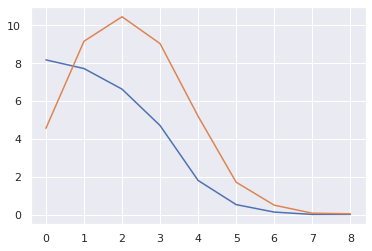

In [ ]:
plt.plot(ferro_mean)
plt.plot(algo_mean)

In [ ]:
ferro_mean = []
algo_ferro_mean = []
for i in range(len(list(modelF['Percent shaved ferroamp'].values())[0])):
  ferro_mean_spec = []
  algo_ferro_mean_spec = []
  for j in range(len(list(modelF['Percent shaved ferroamp'].values()))):
    ferro_mean_spec.append(list(modelF['Percent shaved ferroamp'].values())[j][i])
    algo_ferro_mean_spec.append(list(modelF['Percent shaved algorithm'].values())[j][i])
  ferro_mean.append(st.mean(ferro_mean_spec))
  algo_ferro_mean.append(st.mean(algo_ferro_mean_spec))

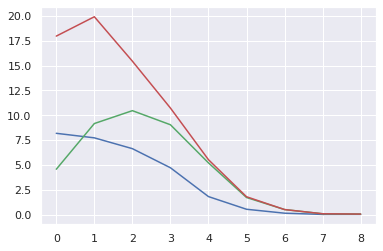

In [ ]:
plt.plot(ferro_mean)
plt.plot(algo_mean,'g')
plt.plot(algo_ferro_mean,'r')

In [ ]:
algo_ferro_lack_of_energy = []
for i in range(len(list(modelF['Lack of energy'].values())[0])):
  algo_ferro_lack_of_energy_spec = []
  for j in range(len(list(modelF['Lack of energy'].values()))):
    algo_ferro_lack_of_energy_spec.append(list(modelF['Lack of energy'].values())[j][i])
  algo_ferro_lack_of_energy.append(st.mean(algo_ferro_lack_of_energy_spec))
  algo_ferro_lack_of_energy.append(st.mean(algo_ferro_lack_of_energy_spec))

In [ ]:
plt.plot(algo_ferro_lack_of_energy)

In [ ]:
test = modelS['Percent shaved algorithm'].keys()
list_of_lists = []
for i in test:
  list_of_lists.append(modelS['Percent shaved algorithm'][i])
column_average_algorithm = [sum(sub_list) / len(sub_list) for sub_list in zip(*list_of_lists)]

In [ ]:
len(full_list)

282

In [ ]:
full_list = list(modelS['Lack of energy'].values())
full_times = []
hour6 = []
hour7 = []
hour8 = []
hour9 = []
hour10 = []
hour11 = []
hour12 = []
hour13 = []
hour14 = []
hour15 = []
for j in range(len(full_list[0])):
  for i in range(len(full_list)):
    hour6.append(list(modelS['Lack of energy'].values())[i][0])
    hour7.append(list(modelS['Lack of energy'].values())[i][1])
    hour8.append(list(modelS['Lack of energy'].values())[i][2])
    hour9.append(list(modelS['Lack of energy'].values())[i][3])
    hour10.append(list(modelS['Lack of energy'].values())[i][4])
    hour11.append(list(modelS['Lack of energy'].values())[i][5])
    hour12.append(list(modelS['Lack of energy'].values())[i][6])
    hour13.append(list(modelS['Lack of energy'].values())[i][7])
    hour14.append(list(modelS['Lack of energy'].values())[i][8])
    hour15.append(list(modelS['Lack of energy'].values())[i][9])
full_times.append(hour6)
full_times.append(hour7)
full_times.append(hour8)
full_times.append(hour9)
full_times.append(hour10)
full_times.append(hour11)
full_times.append(hour12)
full_times.append(hour13)
full_times.append(hour14)
full_times.append(hour15)

In [ ]:
len(full_times)

10

([<matplotlib.axis.XTick at 0x7f782e056550>,
 [Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10'),
  Text(0, 0, '11'),
  Text(0, 0, '12'),
  Text(0, 0, '13'),
  Text(0, 0, '14'),
  Text(0, 0, '15')])

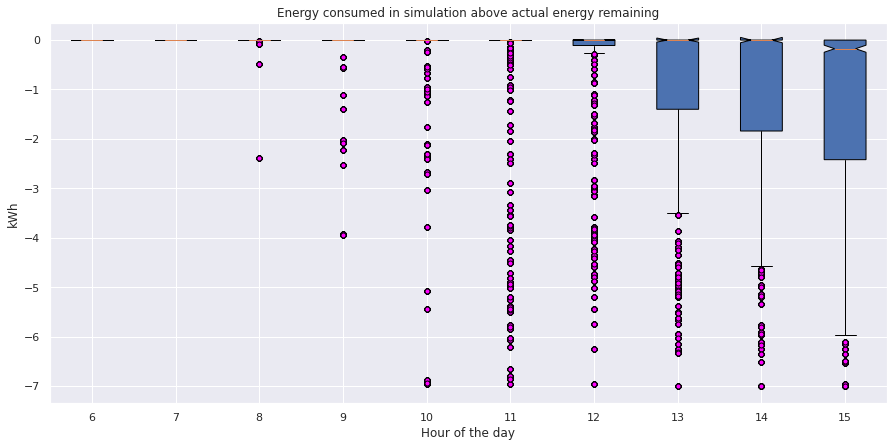

In [ ]:
plt.figure(figsize=(15, 7))
plt.boxplot(full_times, notch=True, patch_artist=True,flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': 'fuchsia'})
plt.ylabel('kWh')
plt.xlabel('Hour of the day')
plt.title('Energy consumed in simulation above actual energy remaining')
labels = [6,7,8,9,10,11,12,13,14,15]
positions = range(1,11)
plt.xticks(positions, labels)


In [ ]:
full_list = list(modelF['Lack of energy'].values())
full_times = []
hour6 = []
hour7 = []
hour8 = []
hour9 = []
hour10 = []
hour11 = []
hour12 = []
hour13 = []
hour14 = []
hour15 = []
for j in range(len(full_list[0])):
  for i in range(len(full_list)):
    hour6.append(list(modelF['Lack of energy'].values())[i][0])
    hour7.append(list(modelF['Lack of energy'].values())[i][1])
    hour8.append(list(modelF['Lack of energy'].values())[i][2])
    hour9.append(list(modelF['Lack of energy'].values())[i][3])
    hour10.append(list(modelF['Lack of energy'].values())[i][4])
    hour11.append(list(modelF['Lack of energy'].values())[i][5])
    hour12.append(list(modelF['Lack of energy'].values())[i][6])
    hour13.append(list(modelF['Lack of energy'].values())[i][7])
    hour14.append(list(modelF['Lack of energy'].values())[i][8])
    hour15.append(list(modelF['Lack of energy'].values())[i][9])
full_times.append(hour6)
full_times.append(hour7)
full_times.append(hour8)
full_times.append(hour9)
full_times.append(hour10)
full_times.append(hour11)
full_times.append(hour12)
full_times.append(hour13)
full_times.append(hour14)
full_times.append(hour15)

([<matplotlib.axis.XTick at 0x7f6964dae410>,
 [Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10'),
  Text(0, 0, '11'),
  Text(0, 0, '12'),
  Text(0, 0, '13'),
  Text(0, 0, '14'),
  Text(0, 0, '15')])

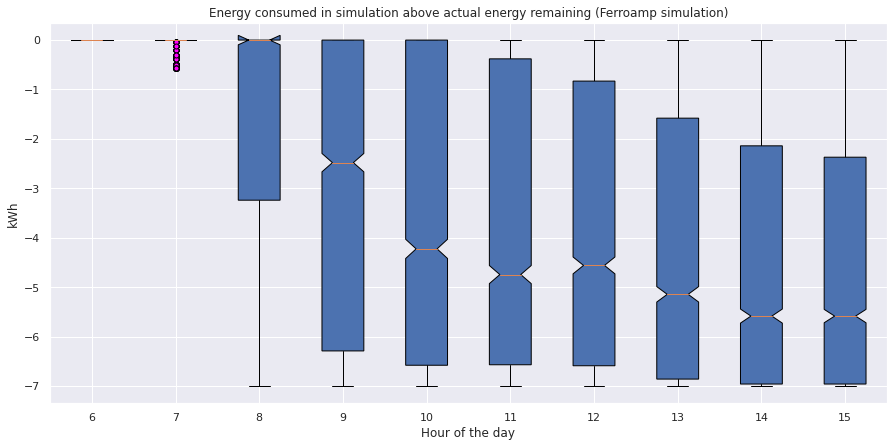

In [ ]:
plt.figure(figsize=(15, 7))
plt.boxplot(full_times, notch=True, patch_artist=True,flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': 'fuchsia'})
plt.ylabel('kWh')
plt.xlabel('Hour of the day')
plt.title('Energy consumed in simulation above actual energy remaining (Ferroamp simulation)')
labels = [6,7,8,9,10,11,12,13,14,15]
positions = range(1,11)
plt.xticks(positions, labels)

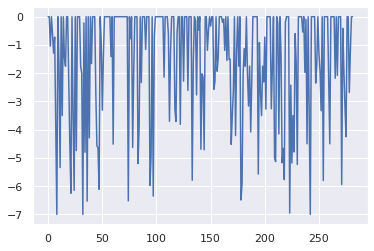

In [ ]:
plt.plot(hour15)

In [ ]:
test = modelS['Lack of energy'].keys()
list_of_lists = []
for i in test:
  list_of_lists.append(modelS['Lack of energy'][i])
column_average= [sum(sub_list) / len(sub_list) for sub_list in zip(*list_of_lists)]

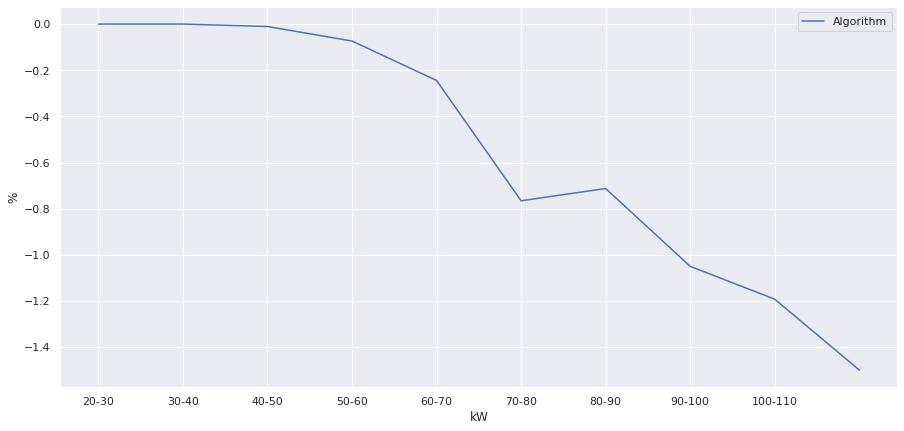

In [ ]:
plt.figure(figsize=(15, 7))
plt.ylabel('%')
plt.xlabel('kW')
plt.plot(column_average)
#plt.plot(column_average_ferroamp)
old_list = list(range(20,101,10))
new_list = [str(x)+'-'+str(x+10) for x in old_list]
labels = new_list
positions = range(0,9)
plt.xticks(positions, labels)
plt.legend(['Algorithm','Ferroamp'])

Mean square algorithm: 47580.0451858156
Mean square ferroamp: 50478.52267234043


Text(0.5, 1.0, 'Genomsnittlig procentuell avkapning')

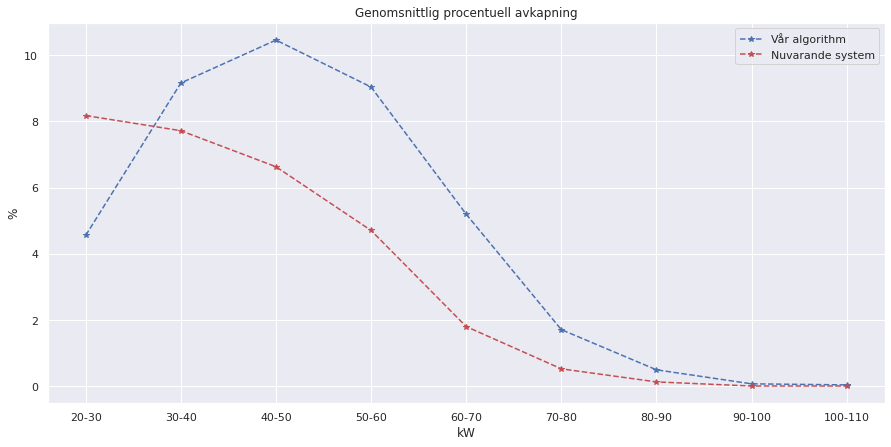

In [ ]:
test_algorithm = modelS['Algorithm squared'].keys()
list_of_lists_algorithm = []
for i in test_algorithm:
  list_of_lists_algorithm.append(modelS['Algorithm squared'][i])
print('Mean square algorithm: ' + str(st.mean(list_of_lists_algorithm)))

test_ferroamp = modelS['Ferroamp squared'].keys()
list_of_lists_ferroamp = []
for i in test_ferroamp:
  list_of_lists_ferroamp.append(modelS['Ferroamp squared'][i])
print('Mean square ferroamp: ' + str(st.mean(list_of_lists_ferroamp)))

plt.figure(figsize=(15, 7))
plt.ylabel('%')
plt.xlabel('kW')
plt.plot(algo_mean,'*--')
plt.plot(ferro_mean,'r*--')
old_list = list(range(20,101,10))
new_list = [str(x)+'-'+str(x+10) for x in old_list]
labels = new_list
positions = range(0,9)
plt.xticks(positions, labels)
plt.legend(['Vår algorithm','Nuvarande system'])
plt.title('Genomsnittlig procentuell avkapning')

In [ ]:
test = modelS['Percent shaved algorithm'].keys()
test_list = list(test)
month_test_list = [k for k in test_list if (k[:7] == '2021-11') or (k[:7] == '2021-12') or (k[:7] == '2022-1-')]

0        18.40
1        18.24
2        19.80
3        20.84
4         0.00
         ...  
17483    26.00
17484    28.28
17485    14.40
17486    16.44
17487    17.08
Name: Effekt kW, Length: 17488, dtype: float64

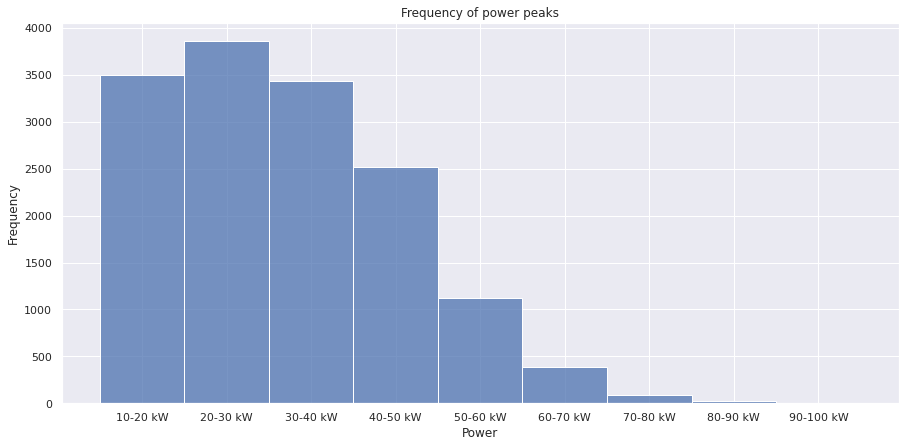

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize=(15, 7))
labels = [10,20,30,40,50,60,70,80,90,100]
h = sns.histplot(df_min['Effekt kW'], bins=labels)
plt.xlabel('Power')
plt.ylabel('Frequency')
plt.title('Frequency of power peaks')

h.set_xticks([15, 25, 35, 45, 55, 65, 75, 85, 95])
h.set_xticklabels(["10-20 kW", "20-30 kW", "30-40 kW", "40-50 kW", "50-60 kW","60-70 kW","70-80 kW","80-90 kW","90-100 kW"])

plt.show()

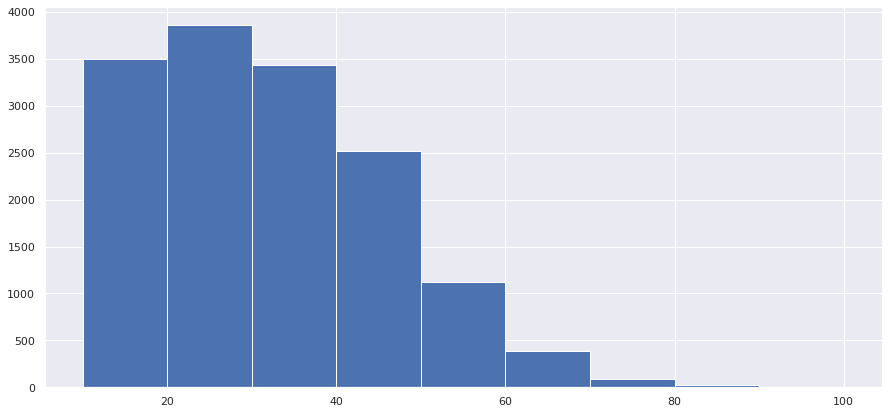

In [ ]:
x = df_min['Effekt kW']
plt.figure(figsize=(15, 7))
labels = [10,20,30,40,50,60,70,80,90,100]
plt.hist(x, bins=labels)
plt.show()

In [ ]:
df.plot(x='col_name_1', y='col_name_2')

In [ ]:
df_min.columns

Index(['Month', 'Day', 'Hour', 'Minute', 'Year', 'Energi kWh', 'Effekt kW',
       'Solproduktion kWh', 'Solproduktion kW', 'Importerat från nät kWh',
       'Importerat från nät kW', 'Egenförbrukning av solel kWh',
       'Egenförbrukning av solel kW', 'Exporterat till nät kWh',
       'Exporterat till nät kW', 'Central', 'Domar', 'Tiunda', 'Ärentuna',
       'Stenhagen', 'Jumkil'],
      dtype='object')

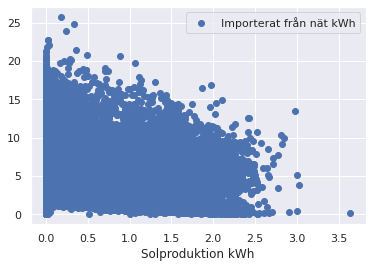

In [ ]:
df_min.plot(x='Solproduktion kWh', y='Importerat från nät kWh', style='o')

In [ ]:
0.17/234.62

0.0007245759099820988

0      0.000725
1      0.000000
2      0.000000
3      0.000032
4      0.000000
         ...   
277    0.179856
278    0.191779
279    0.077439
280    0.028739
281    0.191931
Length: 282, dtype: float64

In [ ]:
df['Sun energy']

0       0.17
1       0.00
2       0.00
3       0.01
4       0.00
       ...  
279    22.65
280     8.09
281    57.09
282    57.36
283    58.42
Name: Sun energy, Length: 284, dtype: float64

In [ ]:
df['Integrated energy']

0      234.62
1      210.81
2      307.68
3      311.89
4      211.71
        ...  
279    292.49
280    281.50
281    297.45
282    319.17
283    310.67
Name: Integrated energy, Length: 284, dtype: float64

In [ ]:
Ferro = list(modelS['Ferroamp squared'].values())
Algorithm = list(modelS['Algorithm squared'].values())
diff = []
for i in range(len(Ferro)):
  diff.append(Ferro[i]-Algorithm[i])
df_new = pd.DataFrame()
df_new['Squared difference'] = diff
df_new['Sun/Integrated'] = df.iloc[:282]['Sun energy']/df.iloc[:282]['Integrated energy']

In [ ]:
df_new['Squared difference']

0      2621.4704
1      2767.9360
2      3196.6880
3      2649.0992
4      4702.0464
         ...    
277   -2199.8480
278    3536.6080
279    6733.6640
280   -2061.9136
281   -2423.8816
Name: Squared difference, Length: 282, dtype: float64

In [ ]:
root_list = list(df_new['Squared difference'])
for i in range(len(root_list)):
  if root_list[i] >= 0:
    root_list[i] = root_list[i]**(1/2)
  elif root_list[i] < 0:
    root_list[i] = -(abs(root_list[i])**(1/2))

In [ ]:

df_new.plot(x='Sun/Integrated',y='Squared difference',logx=True, figsize=(15, 7), style='o')
plt.hlines(y=0, xmin=0, xmax=0.25, color='grey', zorder=1, linewidth=3)
plt.ylabel('Ferroamp^2 - Algorithm^2')
plt.xlabel('Daily sun energy divided by daily total energy consumption (Logarithmic x-axis)')
plt.title('Squared sum difference vs. Daily sun energy/Daily total consumption')

In [ ]:
df_new['Root sum'] = root_list

Text(0.5, 1.0, 'Squared sum difference vs. Daily sun energy/Daily total consumption')

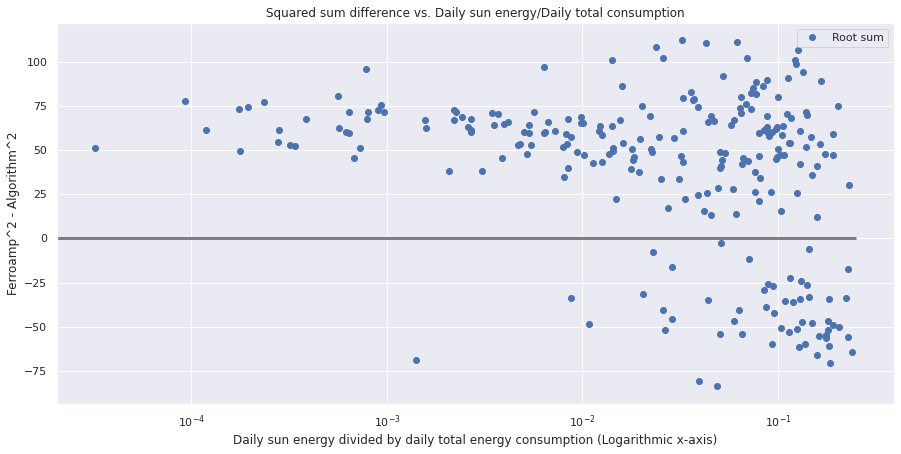

In [ ]:
df_new.plot(x='Sun/Integrated',y='Root sum',logx=True, figsize=(15, 7), style='o')
plt.hlines(y=0, xmin=0, xmax=0.25, color='grey', zorder=1, linewidth=3)
plt.ylabel('Ferroamp^2 - Algorithm^2')
plt.xlabel('Daily sun energy divided by daily total energy consumption (Logarithmic x-axis)')
plt.title('Squared sum difference vs. Daily sun energy/Daily total consumption')

Text(0.5, 1.0, 'Squared sum difference vs. Daily sun energy/Daily total consumption')

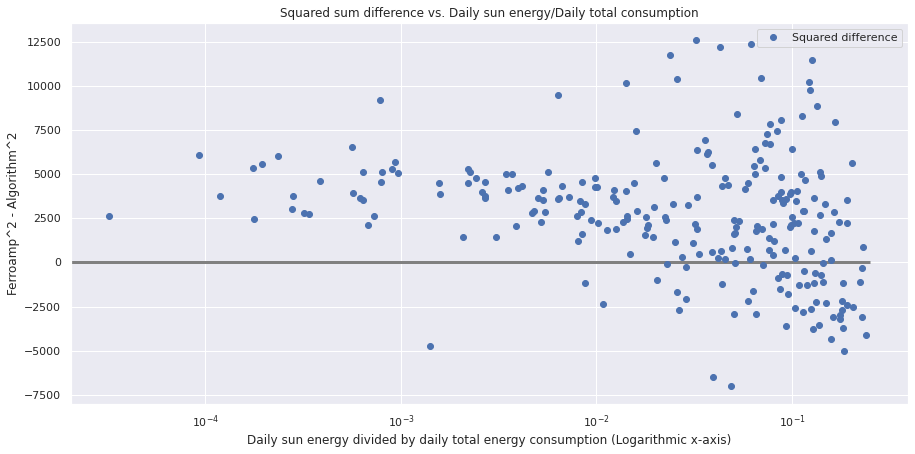

In [ ]:
df_new.plot(x='Sun/Integrated',y='Squared difference',logx=True, figsize=(15, 7), style='o')
plt.hlines(y=0, xmin=0, xmax=0.25, color='grey', zorder=1, linewidth=3)
plt.ylabel('Ferroamp^2 - Algorithm^2')
plt.xlabel('Daily sun energy divided by daily total energy consumption (Logarithmic x-axis)')
plt.title('Squared sum difference vs. Daily sun energy/Daily total consumption')


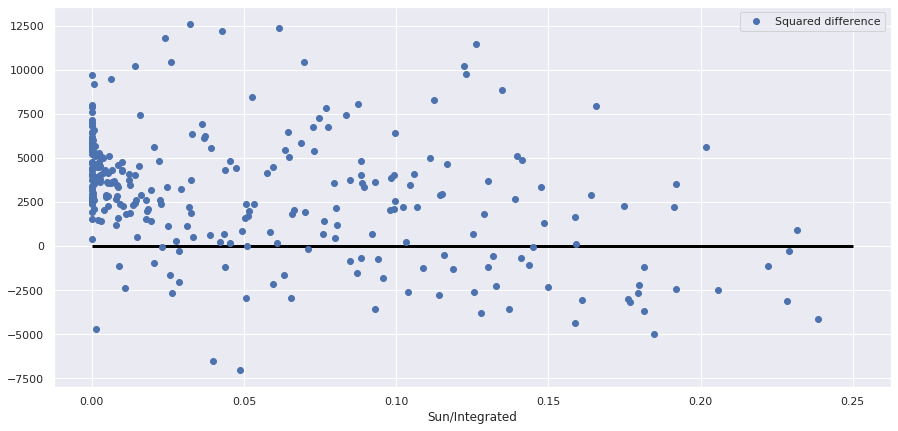

In [ ]:
df_new.plot(x='Sun/Integrated',y='Squared difference', style='o', figsize=(15, 7))
plt.hlines(y=0, xmin=0, xmax=0.25, color='black', zorder=1, linewidth=3)

([<matplotlib.axis.XTick at 0x7f782fcc95d0>,
 [Text(0, 0, 'Jan'),
  Text(0, 0, 'Feb'),
  Text(0, 0, 'Mar'),
  Text(0, 0, 'Apr'),
  Text(0, 0, 'May'),
  Text(0, 0, 'Jun'),
  Text(0, 0, 'Aug'),
  Text(0, 0, 'Sep'),
  Text(0, 0, 'Oct'),
  Text(0, 0, 'Nov'),
  Text(0, 0, 'Dec'),
  Text(0, 0, 'Jan'),
  Text(0, 0, 'Feb'),
  Text(0, 0, 'Mar'),
  Text(0, 0, 'Apr')])

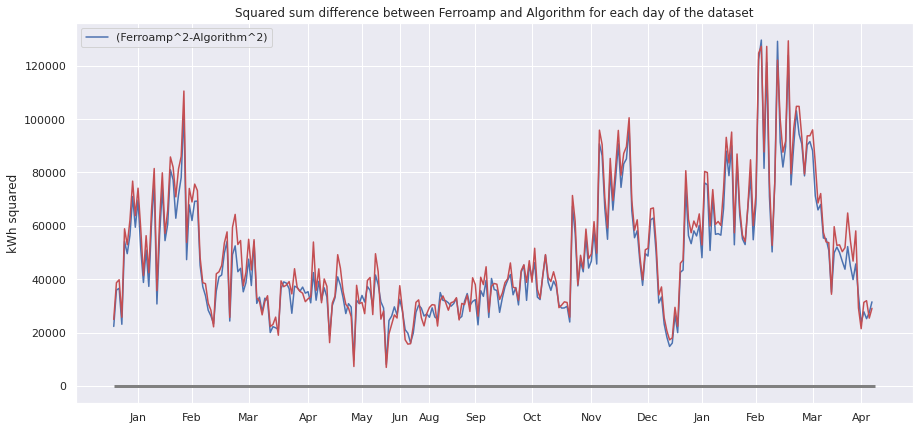

In [ ]:
plt.figure(figsize=(15, 7))
Ferro = list(modelS['Ferroamp squared'].values())
Algorithm = list(modelS['Algorithm squared'].values())
diff = []
for i in range(len(Ferro)):
  diff.append(Ferro[i]-Algorithm[i])

#import numpy as np
#from sklearn.linear_model import LinearRegression
#X = np.array(range(0,283))
#y = diff
# y = 1 * x_0 + 2 * x_1 + 3
#y = np.dot(X, np.array([1, 2])) + 3
#reg = LinearRegression().fit(X, y)

plt.plot(Algorithm)
plt.plot(Ferro,'r')
plt.legend(['(Ferroamp^2-Algorithm^2)'])
plt.title('Squared sum difference between Ferroamp and Algorithm for each day of the dataset')
plt.ylabel('kWh squared')
plt.hlines(y=0, xmin=0, xmax=len(Ferro), color='grey', zorder=1, linewidth=3)
#plt.ylabel('kWh squared')
labels = ['Jan','Feb','Mar','Apr','May','Jun','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']
positions = [9,29,50,72,92,106,117,134,155,177,198,218,238,259,277]
plt.xticks(positions, labels)

In [ ]:
max_value = min(diff)
diff.index(max_value)

246

In [ ]:
diff[272]

12590.288

In [ ]:
df.iloc[246]

Year         2022.0
Month           2.0
Day            25.0
NUGGETS         0.0
SÅS             0.0
              ...  
U10I100K+       0.0
U11I100K+       0.0
U12I100K+       0.0
U13I100K+       0.0
U14I100K+       0.0
Name: 246, Length: 520, dtype: float64

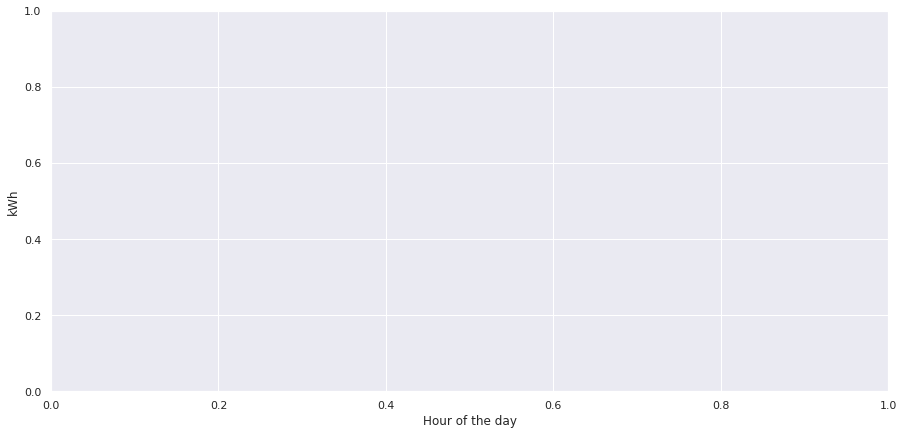

In [ ]:
plt.figure(figsize=(15, 7))
plt.ylabel('kWh')
plt.xlabel('Hour of the day')

test = modelS['Algorithm squared'].keys()
test_list = list(test)



TypeError: ignored

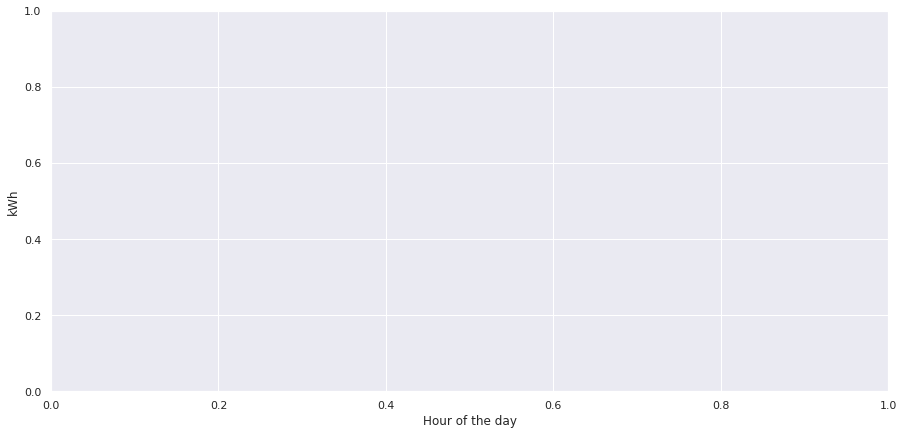

In [ ]:
plt.figure(figsize=(15, 7))
plt.ylabel('kWh')
plt.xlabel('Hour of the day')

test = modelS['Lack of energy'].keys()
test_list = list(test)

month_test_list = test_list
list_of_lists = []
for i in month_test_list:
  list_of_lists.append(modelS['Lack of energy'][i])
column_average_algorithm_full = [sum(sub_list) / len(sub_list) for sub_list in zip(*list_of_lists)]

month_test_list = [k for k in test_list if (k[:7] == '2021-11') or (k[:7] == '2021-12') or (k[:7] == '2022-1-')]
list_of_lists = []
for i in month_test_list:
  list_of_lists.append(modelS['Lack of energy'][i])
column_average_algorithm_low = [sum(sub_list) / len(sub_list) for sub_list in zip(*list_of_lists)]

month_test_list = [k for k in test_list if (k[:7] == '2021-4-') or (k[:7] == '2021-5-') or (k[:7] == '2021-6-') or (k[:7] == '2022-8-')]
list_of_lists = []
for i in month_test_list:
  list_of_lists.append(modelS['Lack of energy'][i])
column_average_algorithm_high = [sum(sub_list) / len(sub_list) for sub_list in zip(*list_of_lists)]

#test = modelS['Percent shaved ferroamp'].keys()
#test_list = list(test)
#month_test_list = [k for k in test_list if (k[:7] == '2021-11') or (k[:7] == '2021-12') or (k[:7] == '2022-1-')]
#list_of_lists = []
#for i in month_test_list:
  #list_of_lists.append(modelS['Percent shaved ferroamp'][i])
#column_average_ferroamp = [sum(sub_list) / len(sub_list) for sub_list in zip(*list_of_lists)]



plt.plot(column_average_algorithm_full,'bo--')
plt.plot(column_average_algorithm_low,'ro--')
plt.plot(column_average_algorithm_high,'go--')

#old_list = list(range(20,101,10))
#new_list = [str(x)+'-'+str(x+10) for x in old_list]
new_list = list(range(6,16))
labels = new_list
positions = range(0,10)
plt.xticks(positions, labels)
plt.legend(['Full dataset','Low sun period','High sun period'])
plt.title('Mean lack of energy for simulated power limits')

In [ ]:
len()